In [1]:
import nltk, json, string, pickle, re
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arsam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arsam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def combine_json_files(first_intents, second_intents):
    with open(first_intents, 'r') as f1:
        sample_intents = json.load(f1)
    with open(second_intents, 'r') as f2:
        new_intents = json.load(f2)
    
    combined_data = {"intents": sample_intents["intents"] + new_intents["intents"]}
    
    with open('hengameh_intents.json', 'w') as file:
        json.dump(combined_data, file)
        
    with open('hengameh_intents.json', 'r') as file:
        hengameh_intents = json.load(file)
    
    return hengameh_intents

In [4]:
hengameh_intents = combine_json_files('sample_intents.json','new_intents.json')

In [5]:
hengameh_intents

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'How are you?'],
   'responses': ['Hello', 'Hi', 'Hi there', 'Hello how are you?']},
  {'tag': 'thanks',
   'patterns': ['Thanks',
    'Thank you',
    "That's helpful",
    'Thanks for the help'],
   'responses': ['Happy to help!',
    'Any time!',
    'My pleasure',
    "You're most welcome!"]},
  {'tag': 'coffee_order',
   'patterns': ['Can I order a coffee?',
    "I'd like to order a coffee please.",
    'What kind of coffee do you recommend?'],
   'responses': ['Sure thing! What kind of coffee would you like?',
    'Of course! Would you like a hot or iced coffee?',
    'Our most popular coffee is our signature blend. Would you like to try it?',
    'Certainly, we have a variety of coffee options available']},
  {'tag': 'menu',
   'patterns': ["What's on the menu?",
    'What do you serve?',
    'Can you show me the menu?'],
   'responses': ['We serve a variety of drinks, including coffee, te

In [6]:
len(hengameh_intents['intents'])

12

In [7]:
intents = []
patterns = []
responses = []
intent_indices = []

for i, intent in enumerate(hengameh_intents['intents']):
    tag = intent['tag']
    for pattern in intent['patterns']:
        intents.append(tag)
        patterns.append(pattern)
        responses.append(intent['responses'])
        intent_indices.append(i)

In [8]:
print(f'Intents\n{intents}\n')
print(f'Patterns\n{patterns}\n')
print(f'Responses\n{responses}\n')
print(f'Intent Indices\n{intent_indices}\n')

Intents
['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'thanks', 'thanks', 'thanks', 'thanks', 'coffee_order', 'coffee_order', 'coffee_order', 'menu', 'menu', 'menu', 'sizes', 'sizes', 'sizes', 'flavors', 'flavors', 'flavors', 'specials', 'specials', 'specials', 'hours', 'hours', 'hours', 'pricing', 'pricing', 'pricing', 'payment', 'payment', 'payment', 'pickup', 'pickup', 'pickup', 'location', 'location', 'location']

Patterns
['Hi', 'Hey', 'Is anyone there?', 'Hello', 'How are you?', 'Thanks', 'Thank you', "That's helpful", 'Thanks for the help', 'Can I order a coffee?', "I'd like to order a coffee please.", 'What kind of coffee do you recommend?', "What's on the menu?", 'What do you serve?', 'Can you show me the menu?', 'What sizes do you offer?', 'Can I get a large coffee?', 'Do you have a small size?', 'What kind of flavors do you have?', 'Do you have any seasonal flavors?', 'Can I get a vanilla latte?', 'What are your specials?', 'Do you have any deals?', "What's on

In [9]:
set(intents)

{'coffee_order',
 'flavors',
 'greeting',
 'hours',
 'location',
 'menu',
 'payment',
 'pickup',
 'pricing',
 'sizes',
 'specials',
 'thanks'}

In [10]:
print(f'Intents\n{intents[13]}\n')
print(f'Patterns\n{patterns[13]}\n')
print(f'Responses\n{responses[13]}\n')
print(f'Intent Indices\n{intent_indices[13]}\n')

Intents
menu

Patterns
What do you serve?

Responses
['We serve a variety of drinks, including coffee, tea, and hot chocolate. Would you like me to send you our menu?', "Our menu includes a wide selection of beverages, from classic lattes to specialty drinks. I can send it to you if you'd like.", 'Sure! Our menu features a range of drinks and snacks, including vegan and gluten-free options. Would you like to see it?', "We also offer a selection of delicious pastries and sandwiches, perfect for a quick bite or a full meal. Let me know if you'd like me to include that in the menu I send you.", "Our menu also features seasonal drinks and specials that change throughout the year. Be sure to check in with us often to see what's new!"]

Intent Indices
3



In [11]:
print(f'Intents uniques :\n{set(intents)}\n')
print(f'Intent Indices uniques\n{set(intent_indices)}')

Intents uniques :
{'specials', 'menu', 'pickup', 'location', 'sizes', 'coffee_order', 'flavors', 'greeting', 'pricing', 'hours', 'thanks', 'payment'}

Intent Indices uniques
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [12]:
le = LabelEncoder()
classes = le.fit_transform(intents)
# intents_labels = to_categorical(classes)

In [13]:
print(f'Classes: {len(classes)}\n{classes}\n')
print(f'Intents: {len(intents)}\n{intents}\n')
# print(f'Encoder Classes: \n{intents_labels}')

Classes: 39
[ 2  2  2  2  2 11 11 11 11  0  0  0  5  5  5  9  9  9  1  1  1 10 10 10
  3  3  3  8  8  8  6  6  6  7  7  7  4  4  4]

Intents: 39
['greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'thanks', 'thanks', 'thanks', 'thanks', 'coffee_order', 'coffee_order', 'coffee_order', 'menu', 'menu', 'menu', 'sizes', 'sizes', 'sizes', 'flavors', 'flavors', 'flavors', 'specials', 'specials', 'specials', 'hours', 'hours', 'hours', 'pricing', 'pricing', 'pricing', 'payment', 'payment', 'payment', 'pickup', 'pickup', 'pickup', 'location', 'location', 'location']



In [14]:
lm = WordNetLemmatizer()

# preprocessed_words = []

# for word in patterns:
#     word = re.sub(r"[^a-z\s]", "", word.lower())
#     word = re.sub(r"\d+", "", word)
#     word = re.sub(r"\s+", " ", word).strip()

#     if word not in string.punctuation:
#         preprocessed_word = lm.lemmatize(word)
#         preprocessed_words.append(preprocessed_word)

preprocessed_words = [lm.lemmatize(re.sub(r"[^a-z\s]", "", re.sub(r"\d+", "", re.sub(r"\s+", " ", \
                        word.lower()))).strip()) for word in patterns if word not in string.punctuation]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_words)
pattern_sequences = tokenizer.texts_to_sequences(preprocessed_words)
word_index = tokenizer.word_index

In [15]:
print(f'Tokens number: {len(word_index)}')
print(f'\nWord with its index:\n {word_index}')
print(f'\nPattern sequences:\n{pattern_sequences}')
print(f'\nOriginal Pattern:\n{patterns}')
print(f'\nPreprocess Pattern:\n{preprocessed_words}')

Tokens number: 80

Word with its index:
 {'you': 1, 'do': 2, 'can': 3, 'what': 4, 'are': 5, 'a': 6, 'i': 7, 'have': 8, 'the': 9, 'coffee': 10, 'whats': 11, 'your': 12, 'how': 13, 'for': 14, 'order': 15, 'any': 16, 'pickup': 17, 'is': 18, 'there': 19, 'thanks': 20, 'like': 21, 'kind': 22, 'of': 23, 'on': 24, 'menu': 25, 'me': 26, 'offer': 27, 'get': 28, 'flavors': 29, 'latte': 30, 'specials': 31, 'open': 32, 'an': 33, 'hi': 34, 'hey': 35, 'anyone': 36, 'hello': 37, 'thank': 38, 'thats': 39, 'helpful': 40, 'help': 41, 'id': 42, 'to': 43, 'please': 44, 'recommend': 45, 'serve': 46, 'show': 47, 'sizes': 48, 'large': 49, 'small': 50, 'size': 51, 'seasonal': 52, 'vanilla': 53, 'deals': 54, 'sale': 55, 'today': 56, 'hours': 57, 'when': 58, 'and': 59, 'close': 60, 'now': 61, 'much': 62, 'does': 63, 'cost': 64, 'prices': 65, 'or': 66, 'discounts': 67, 'pay': 68, 'accept': 69, 'credit': 70, 'cards': 71, 'atm': 72, 'nearby': 73, 'place': 74, 'process': 75, 'where': 76, 'located': 77, 'address': 7

In [16]:
word_index

{'you': 1,
 'do': 2,
 'can': 3,
 'what': 4,
 'are': 5,
 'a': 6,
 'i': 7,
 'have': 8,
 'the': 9,
 'coffee': 10,
 'whats': 11,
 'your': 12,
 'how': 13,
 'for': 14,
 'order': 15,
 'any': 16,
 'pickup': 17,
 'is': 18,
 'there': 19,
 'thanks': 20,
 'like': 21,
 'kind': 22,
 'of': 23,
 'on': 24,
 'menu': 25,
 'me': 26,
 'offer': 27,
 'get': 28,
 'flavors': 29,
 'latte': 30,
 'specials': 31,
 'open': 32,
 'an': 33,
 'hi': 34,
 'hey': 35,
 'anyone': 36,
 'hello': 37,
 'thank': 38,
 'thats': 39,
 'helpful': 40,
 'help': 41,
 'id': 42,
 'to': 43,
 'please': 44,
 'recommend': 45,
 'serve': 46,
 'show': 47,
 'sizes': 48,
 'large': 49,
 'small': 50,
 'size': 51,
 'seasonal': 52,
 'vanilla': 53,
 'deals': 54,
 'sale': 55,
 'today': 56,
 'hours': 57,
 'when': 58,
 'and': 59,
 'close': 60,
 'now': 61,
 'much': 62,
 'does': 63,
 'cost': 64,
 'prices': 65,
 'or': 66,
 'discounts': 67,
 'pay': 68,
 'accept': 69,
 'credit': 70,
 'cards': 71,
 'atm': 72,
 'nearby': 73,
 'place': 74,
 'process': 75,
 'where

In [17]:
input_length = 35

max_len = max([len(seq) for seq in pattern_sequences])
padded_sequences = pad_sequences(pattern_sequences, maxlen=input_length)

In [18]:
print(f'Maximum words in pattern is {max_len}\n')
print(f'Padded sequences:\n {padded_sequences}\n')
print(f'First Padded sequences:\n {padded_sequences[0]}')

Maximum words in pattern is 7

Padded sequences:
 [[ 0  0  0 ...  0  0 34]
 [ 0  0  0 ...  0  0 35]
 [ 0  0  0 ... 18 36 19]
 ...
 [ 0  0  0 ...  5  1 77]
 [ 0  0  0 ... 11 12 78]
 [ 0  0  0 ... 79 26 80]]

First Padded sequences:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 34]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, classes, test_size=.2)

In [20]:
print(f'Train shape:  {x_train.shape} , {y_train.shape}')
print(f'Test shape:   {x_test.shape}  , {y_test.shape}')

Train shape:  (31, 35) , (31,)
Test shape:   (8, 35)  , (8,)


In [21]:
def create_model():
    model = Sequential()
    model.add(Embedding(input_dim=1100, output_dim=20, input_length=input_length))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(len(set(classes)), activation='softmax'))
    return model

In [22]:
model = create_model()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 20)            22000     
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 12)                132       
                                                                 
Total params: 22,638
Trainable params: 22,638
Non-trainable params: 0
____________________________________________________

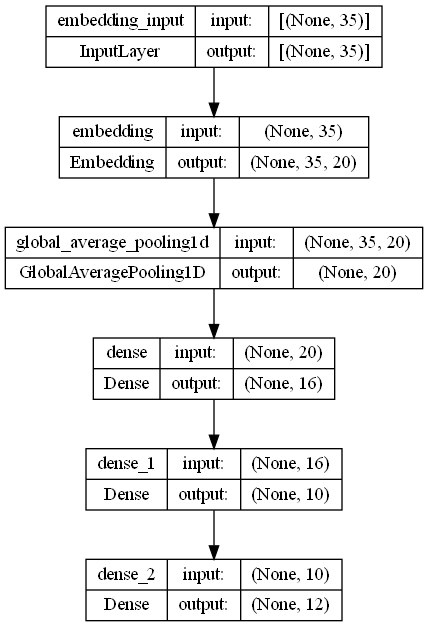

In [23]:
plot_model(model, to_file='model_summary.png', show_shapes=True)

In [24]:
history500 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.5397 - accuracy: 0.0645 - val_loss: 2.5345 - val_accuracy: 0.1250
Epoch 2/500
1/1 [==============================] - 0s 56ms/step - loss: 2.5375 - accuracy: 0.0645 - val_loss: 2.5359 - val_accuracy: 0.1250
Epoch 3/500
1/1 [==============================] - 0s 61ms/step - loss: 2.5353 - accuracy: 0.0645 - val_loss: 2.5374 - val_accuracy: 0.1250
Epoch 4/500
1/1 [==============================] - 0s 57ms/step - loss: 2.5331 - accuracy: 0.0645 - val_loss: 2.5388 - val_accuracy: 0.1250
Epoch 5/500
1/1 [==============================] - 0s 56ms/step - loss: 2.5310 - accuracy: 0.0645 - val_loss: 2.5403 - val_accuracy: 0.1250
Epoch 6/500
1/1 [==============================] - 0s 56ms/step - loss: 2.5290 - accuracy: 0.0645 - val_loss: 2.5418 - val_accuracy: 0.1250
Epoch 7/500
1/1 [==============================] - 0s 54ms/step - loss: 2.5269 - accuracy: 0.0645 - val_loss: 2.5433 - val_accuracy: 0.1250
Epoch 8/500
1/1 [=====

1/1 [==============================] - 0s 61ms/step - loss: 2.4579 - accuracy: 0.1290 - val_loss: 2.6325 - val_accuracy: 0.1250
Epoch 60/500
1/1 [==============================] - 0s 51ms/step - loss: 2.4571 - accuracy: 0.1290 - val_loss: 2.6348 - val_accuracy: 0.1250
Epoch 61/500
1/1 [==============================] - 0s 61ms/step - loss: 2.4563 - accuracy: 0.1290 - val_loss: 2.6371 - val_accuracy: 0.1250
Epoch 62/500
1/1 [==============================] - 0s 53ms/step - loss: 2.4555 - accuracy: 0.1290 - val_loss: 2.6394 - val_accuracy: 0.1250
Epoch 63/500
1/1 [==============================] - 0s 50ms/step - loss: 2.4547 - accuracy: 0.1290 - val_loss: 2.6417 - val_accuracy: 0.1250
Epoch 64/500
1/1 [==============================] - 0s 54ms/step - loss: 2.4540 - accuracy: 0.1290 - val_loss: 2.6440 - val_accuracy: 0.1250
Epoch 65/500
1/1 [==============================] - 0s 64ms/step - loss: 2.4532 - accuracy: 0.1290 - val_loss: 2.6462 - val_accuracy: 0.1250
Epoch 66/500
1/1 [========

1/1 [==============================] - 0s 56ms/step - loss: 2.4254 - accuracy: 0.1290 - val_loss: 2.7441 - val_accuracy: 0.1250
Epoch 118/500
1/1 [==============================] - 0s 56ms/step - loss: 2.4249 - accuracy: 0.1290 - val_loss: 2.7454 - val_accuracy: 0.1250
Epoch 119/500
1/1 [==============================] - 0s 48ms/step - loss: 2.4245 - accuracy: 0.1290 - val_loss: 2.7467 - val_accuracy: 0.1250
Epoch 120/500
1/1 [==============================] - 0s 56ms/step - loss: 2.4241 - accuracy: 0.1290 - val_loss: 2.7480 - val_accuracy: 0.1250
Epoch 121/500
1/1 [==============================] - 0s 56ms/step - loss: 2.4236 - accuracy: 0.1290 - val_loss: 2.7492 - val_accuracy: 0.1250
Epoch 122/500
1/1 [==============================] - 0s 56ms/step - loss: 2.4232 - accuracy: 0.1290 - val_loss: 2.7504 - val_accuracy: 0.1250
Epoch 123/500
1/1 [==============================] - 0s 56ms/step - loss: 2.4227 - accuracy: 0.1290 - val_loss: 2.7516 - val_accuracy: 0.1250
Epoch 124/500
1/1 [=

Epoch 175/500
1/1 [==============================] - 0s 60ms/step - loss: 2.3855 - accuracy: 0.1290 - val_loss: 2.7714 - val_accuracy: 0.1250
Epoch 176/500
1/1 [==============================] - 0s 51ms/step - loss: 2.3842 - accuracy: 0.1290 - val_loss: 2.7708 - val_accuracy: 0.1250
Epoch 177/500
1/1 [==============================] - 0s 53ms/step - loss: 2.3828 - accuracy: 0.1290 - val_loss: 2.7702 - val_accuracy: 0.1250
Epoch 178/500
1/1 [==============================] - 0s 56ms/step - loss: 2.3815 - accuracy: 0.1290 - val_loss: 2.7696 - val_accuracy: 0.1250
Epoch 179/500
1/1 [==============================] - 0s 53ms/step - loss: 2.3801 - accuracy: 0.1290 - val_loss: 2.7690 - val_accuracy: 0.1250
Epoch 180/500
1/1 [==============================] - 0s 53ms/step - loss: 2.3786 - accuracy: 0.1290 - val_loss: 2.7684 - val_accuracy: 0.1250
Epoch 181/500
1/1 [==============================] - 0s 55ms/step - loss: 2.3771 - accuracy: 0.1290 - val_loss: 2.7678 - val_accuracy: 0.1250
Epoch 

Epoch 233/500
1/1 [==============================] - 0s 61ms/step - loss: 2.2481 - accuracy: 0.2903 - val_loss: 2.7482 - val_accuracy: 0.1250
Epoch 234/500
1/1 [==============================] - 0s 47ms/step - loss: 2.2446 - accuracy: 0.2903 - val_loss: 2.7473 - val_accuracy: 0.1250
Epoch 235/500
1/1 [==============================] - 0s 49ms/step - loss: 2.2410 - accuracy: 0.2903 - val_loss: 2.7457 - val_accuracy: 0.1250
Epoch 236/500
1/1 [==============================] - 0s 46ms/step - loss: 2.2374 - accuracy: 0.2903 - val_loss: 2.7438 - val_accuracy: 0.1250
Epoch 237/500
1/1 [==============================] - 0s 47ms/step - loss: 2.2338 - accuracy: 0.2903 - val_loss: 2.7421 - val_accuracy: 0.1250
Epoch 238/500
1/1 [==============================] - 0s 47ms/step - loss: 2.2301 - accuracy: 0.2903 - val_loss: 2.7408 - val_accuracy: 0.1250
Epoch 239/500
1/1 [==============================] - 0s 63ms/step - loss: 2.2264 - accuracy: 0.2903 - val_loss: 2.7398 - val_accuracy: 0.1250
Epoch 

Epoch 291/500
1/1 [==============================] - 0s 63ms/step - loss: 2.0005 - accuracy: 0.3548 - val_loss: 2.6680 - val_accuracy: 0.1250
Epoch 292/500
1/1 [==============================] - 0s 47ms/step - loss: 1.9958 - accuracy: 0.3548 - val_loss: 2.6650 - val_accuracy: 0.1250
Epoch 293/500
1/1 [==============================] - 0s 63ms/step - loss: 1.9912 - accuracy: 0.3548 - val_loss: 2.6635 - val_accuracy: 0.1250
Epoch 294/500
1/1 [==============================] - 0s 56ms/step - loss: 1.9866 - accuracy: 0.3548 - val_loss: 2.6634 - val_accuracy: 0.1250
Epoch 295/500
1/1 [==============================] - 0s 47ms/step - loss: 1.9821 - accuracy: 0.3548 - val_loss: 2.6601 - val_accuracy: 0.1250
Epoch 296/500
1/1 [==============================] - 0s 47ms/step - loss: 1.9775 - accuracy: 0.3226 - val_loss: 2.6557 - val_accuracy: 0.1250
Epoch 297/500
1/1 [==============================] - 0s 47ms/step - loss: 1.9729 - accuracy: 0.3226 - val_loss: 2.6535 - val_accuracy: 0.1250
Epoch 

Epoch 349/500
1/1 [==============================] - 0s 63ms/step - loss: 1.7555 - accuracy: 0.3871 - val_loss: 2.5438 - val_accuracy: 0.1250
Epoch 350/500
1/1 [==============================] - 0s 47ms/step - loss: 1.7517 - accuracy: 0.3871 - val_loss: 2.5426 - val_accuracy: 0.1250
Epoch 351/500
1/1 [==============================] - 0s 47ms/step - loss: 1.7479 - accuracy: 0.3871 - val_loss: 2.5404 - val_accuracy: 0.1250
Epoch 352/500
1/1 [==============================] - 0s 47ms/step - loss: 1.7441 - accuracy: 0.3871 - val_loss: 2.5374 - val_accuracy: 0.1250
Epoch 353/500
1/1 [==============================] - 0s 47ms/step - loss: 1.7404 - accuracy: 0.3871 - val_loss: 2.5347 - val_accuracy: 0.1250
Epoch 354/500
1/1 [==============================] - 0s 47ms/step - loss: 1.7366 - accuracy: 0.3871 - val_loss: 2.5329 - val_accuracy: 0.1250
Epoch 355/500
1/1 [==============================] - 0s 63ms/step - loss: 1.7329 - accuracy: 0.3871 - val_loss: 2.5312 - val_accuracy: 0.1250
Epoch 

Epoch 407/500
1/1 [==============================] - 0s 47ms/step - loss: 1.5534 - accuracy: 0.5484 - val_loss: 2.4256 - val_accuracy: 0.1250
Epoch 408/500
1/1 [==============================] - 0s 62ms/step - loss: 1.5502 - accuracy: 0.5484 - val_loss: 2.4232 - val_accuracy: 0.1250
Epoch 409/500
1/1 [==============================] - 0s 47ms/step - loss: 1.5471 - accuracy: 0.5484 - val_loss: 2.4201 - val_accuracy: 0.1250
Epoch 410/500
1/1 [==============================] - 0s 48ms/step - loss: 1.5439 - accuracy: 0.5484 - val_loss: 2.4179 - val_accuracy: 0.1250
Epoch 411/500
1/1 [==============================] - 0s 46ms/step - loss: 1.5408 - accuracy: 0.5484 - val_loss: 2.4169 - val_accuracy: 0.1250
Epoch 412/500
1/1 [==============================] - 0s 63ms/step - loss: 1.5377 - accuracy: 0.5484 - val_loss: 2.4155 - val_accuracy: 0.1250
Epoch 413/500
1/1 [==============================] - 0s 47ms/step - loss: 1.5346 - accuracy: 0.5484 - val_loss: 2.4124 - val_accuracy: 0.1250
Epoch 

Epoch 465/500
1/1 [==============================] - 0s 47ms/step - loss: 1.3894 - accuracy: 0.6452 - val_loss: 2.3128 - val_accuracy: 0.1250
Epoch 466/500
1/1 [==============================] - 0s 63ms/step - loss: 1.3869 - accuracy: 0.6452 - val_loss: 2.3114 - val_accuracy: 0.1250
Epoch 467/500
1/1 [==============================] - 0s 47ms/step - loss: 1.3844 - accuracy: 0.6452 - val_loss: 2.3090 - val_accuracy: 0.1250
Epoch 468/500
1/1 [==============================] - 0s 47ms/step - loss: 1.3819 - accuracy: 0.6452 - val_loss: 2.3062 - val_accuracy: 0.1250
Epoch 469/500
1/1 [==============================] - 0s 47ms/step - loss: 1.3795 - accuracy: 0.6452 - val_loss: 2.3048 - val_accuracy: 0.1250
Epoch 470/500
1/1 [==============================] - 0s 48ms/step - loss: 1.3770 - accuracy: 0.6452 - val_loss: 2.3043 - val_accuracy: 0.1250
Epoch 471/500
1/1 [==============================] - 0s 47ms/step - loss: 1.3746 - accuracy: 0.6452 - val_loss: 2.3032 - val_accuracy: 0.1250
Epoch 

In [25]:
print(f"Epoches 500\nAcuuracy on Train set : {history500.history['accuracy'][-1]:.2f}")
print(f"Acuuracy on Validation set : {history500.history['val_accuracy'][-1]}")

Epoches 500
Acuuracy on Train set : 0.68
Acuuracy on Validation set : 0.125


In [26]:
history1000 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 141ms/step - loss: 1.3062 - accuracy: 0.6774 - val_loss: 2.2600 - val_accuracy: 0.1250
Epoch 2/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3041 - accuracy: 0.6774 - val_loss: 2.2591 - val_accuracy: 0.1250
Epoch 3/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3020 - accuracy: 0.6774 - val_loss: 2.2591 - val_accuracy: 0.1250
Epoch 4/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2999 - accuracy: 0.6774 - val_loss: 2.2583 - val_accuracy: 0.1250
Epoch 5/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2978 - accuracy: 0.6774 - val_loss: 2.2564 - val_accuracy: 0.1250
Epoch 6/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2957 - accuracy: 0.6774 - val_loss: 2.2541 - val_accuracy: 0.1250
Epoch 7/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2936 - accuracy: 0.6452 - val_loss: 2.2534 - val_accuracy: 0.1250
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1942 - accuracy: 0.6452 - val_loss: 2.2124 - val_accuracy: 0.1250
Epoch 60/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.1924 - accuracy: 0.6452 - val_loss: 2.2125 - val_accuracy: 0.1250
Epoch 61/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1906 - accuracy: 0.6452 - val_loss: 2.2120 - val_accuracy: 0.1250
Epoch 62/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1889 - accuracy: 0.6452 - val_loss: 2.2106 - val_accuracy: 0.1250
Epoch 63/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1871 - accuracy: 0.6452 - val_loss: 2.2098 - val_accuracy: 0.1250
Epoch 64/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.1854 - accuracy: 0.6452 - val_loss: 2.2100 - val_accuracy: 0.1250
Epoch 65/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.1837 - accuracy: 0.6452 - val_loss: 2.2100 - val_accuracy: 0.1250
Epoch 

1/1 [==============================] - 0s 47ms/step - loss: 1.0995 - accuracy: 0.6774 - val_loss: 2.1824 - val_accuracy: 0.1250
Epoch 117/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.0979 - accuracy: 0.6774 - val_loss: 2.1821 - val_accuracy: 0.1250
Epoch 118/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0963 - accuracy: 0.6774 - val_loss: 2.1817 - val_accuracy: 0.1250
Epoch 119/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.0947 - accuracy: 0.6774 - val_loss: 2.1814 - val_accuracy: 0.1250
Epoch 120/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0931 - accuracy: 0.6774 - val_loss: 2.1806 - val_accuracy: 0.1250
Epoch 121/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0915 - accuracy: 0.6774 - val_loss: 2.1797 - val_accuracy: 0.1250
Epoch 122/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0899 - accuracy: 0.6774 - val_loss: 2.1790 - val_accuracy: 0.1250
Epoch 123/1000

1/1 [==============================] - 0s 47ms/step - loss: 1.0100 - accuracy: 0.7097 - val_loss: 2.1549 - val_accuracy: 0.1250
Epoch 174/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0084 - accuracy: 0.7097 - val_loss: 2.1545 - val_accuracy: 0.1250
Epoch 175/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0069 - accuracy: 0.7097 - val_loss: 2.1545 - val_accuracy: 0.1250
Epoch 176/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0053 - accuracy: 0.7419 - val_loss: 2.1545 - val_accuracy: 0.1250
Epoch 177/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0037 - accuracy: 0.7097 - val_loss: 2.1542 - val_accuracy: 0.1250
Epoch 178/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0022 - accuracy: 0.7419 - val_loss: 2.1536 - val_accuracy: 0.1250
Epoch 179/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.0006 - accuracy: 0.7419 - val_loss: 2.1531 - val_accuracy: 0.1250
Epoch 180/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.9207 - accuracy: 0.8065 - val_loss: 2.1320 - val_accuracy: 0.1250
Epoch 231/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.9191 - accuracy: 0.8065 - val_loss: 2.1317 - val_accuracy: 0.1250
Epoch 232/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.9175 - accuracy: 0.8065 - val_loss: 2.1314 - val_accuracy: 0.1250
Epoch 233/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.9160 - accuracy: 0.8065 - val_loss: 2.1311 - val_accuracy: 0.1250
Epoch 234/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.9143 - accuracy: 0.8065 - val_loss: 2.1306 - val_accuracy: 0.1250
Epoch 235/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.9127 - accuracy: 0.8065 - val_loss: 2.1304 - val_accuracy: 0.1250
Epoch 236/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.9111 - accuracy: 0.8065 - val_loss: 2.1302 - val_accuracy: 0.1250
Epoch 237/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.8284 - accuracy: 0.8387 - val_loss: 2.1252 - val_accuracy: 0.1250
Epoch 288/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8268 - accuracy: 0.8387 - val_loss: 2.1253 - val_accuracy: 0.1250
Epoch 289/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8252 - accuracy: 0.8387 - val_loss: 2.1252 - val_accuracy: 0.1250
Epoch 290/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8237 - accuracy: 0.8387 - val_loss: 2.1252 - val_accuracy: 0.1250
Epoch 291/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8221 - accuracy: 0.8387 - val_loss: 2.1254 - val_accuracy: 0.1250
Epoch 292/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8206 - accuracy: 0.8387 - val_loss: 2.1255 - val_accuracy: 0.1250
Epoch 293/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8190 - accuracy: 0.8387 - val_loss: 2.1256 - val_accuracy: 0.1250
Epoch 294/1000

1/1 [==============================] - 0s 60ms/step - loss: 0.7480 - accuracy: 0.8710 - val_loss: 2.1320 - val_accuracy: 0.1250
Epoch 345/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7468 - accuracy: 0.8710 - val_loss: 2.1322 - val_accuracy: 0.1250
Epoch 346/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7455 - accuracy: 0.8710 - val_loss: 2.1321 - val_accuracy: 0.1250
Epoch 347/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7443 - accuracy: 0.8710 - val_loss: 2.1324 - val_accuracy: 0.1250
Epoch 348/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7431 - accuracy: 0.8710 - val_loss: 2.1328 - val_accuracy: 0.1250
Epoch 349/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.7419 - accuracy: 0.8710 - val_loss: 2.1330 - val_accuracy: 0.1250
Epoch 350/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7406 - accuracy: 0.8710 - val_loss: 2.1332 - val_accuracy: 0.1250
Epoch 351/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.6837 - accuracy: 0.8710 - val_loss: 2.1549 - val_accuracy: 0.1250
Epoch 402/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6827 - accuracy: 0.8710 - val_loss: 2.1553 - val_accuracy: 0.1250
Epoch 403/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6817 - accuracy: 0.8710 - val_loss: 2.1557 - val_accuracy: 0.1250
Epoch 404/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.6807 - accuracy: 0.8710 - val_loss: 2.1563 - val_accuracy: 0.1250
Epoch 405/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6797 - accuracy: 0.8710 - val_loss: 2.1570 - val_accuracy: 0.1250
Epoch 406/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.6787 - accuracy: 0.8710 - val_loss: 2.1578 - val_accuracy: 0.1250
Epoch 407/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6776 - accuracy: 0.8710 - val_loss: 2.1583 - val_accuracy: 0.1250
Epoch 408/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.6299 - accuracy: 0.8710 - val_loss: 2.1924 - val_accuracy: 0.1250
Epoch 459/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.6290 - accuracy: 0.8710 - val_loss: 2.1929 - val_accuracy: 0.1250
Epoch 460/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6281 - accuracy: 0.8710 - val_loss: 2.1939 - val_accuracy: 0.1250
Epoch 461/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.6273 - accuracy: 0.8710 - val_loss: 2.1947 - val_accuracy: 0.1250
Epoch 462/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6264 - accuracy: 0.8710 - val_loss: 2.1953 - val_accuracy: 0.1250
Epoch 463/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6255 - accuracy: 0.8710 - val_loss: 2.1959 - val_accuracy: 0.1250
Epoch 464/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6247 - accuracy: 0.8710 - val_loss: 2.1967 - val_accuracy: 0.1250
Epoch 465/1000

1/1 [==============================] - 0s 63ms/step - loss: 0.5837 - accuracy: 0.8710 - val_loss: 2.2384 - val_accuracy: 0.1250
Epoch 516/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5829 - accuracy: 0.8710 - val_loss: 2.2394 - val_accuracy: 0.1250
Epoch 517/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5822 - accuracy: 0.8710 - val_loss: 2.2401 - val_accuracy: 0.1250
Epoch 518/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.5814 - accuracy: 0.8710 - val_loss: 2.2409 - val_accuracy: 0.1250
Epoch 519/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5807 - accuracy: 0.8710 - val_loss: 2.2418 - val_accuracy: 0.1250
Epoch 520/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5799 - accuracy: 0.8710 - val_loss: 2.2426 - val_accuracy: 0.1250
Epoch 521/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5792 - accuracy: 0.8710 - val_loss: 2.2438 - val_accuracy: 0.1250
Epoch 522/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.5433 - accuracy: 0.8710 - val_loss: 2.2881 - val_accuracy: 0.1250
Epoch 573/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5426 - accuracy: 0.8710 - val_loss: 2.2888 - val_accuracy: 0.1250
Epoch 574/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5419 - accuracy: 0.8710 - val_loss: 2.2895 - val_accuracy: 0.1250
Epoch 575/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5412 - accuracy: 0.8710 - val_loss: 2.2909 - val_accuracy: 0.1250
Epoch 576/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.5405 - accuracy: 0.8710 - val_loss: 2.2919 - val_accuracy: 0.1250
Epoch 577/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.5399 - accuracy: 0.8710 - val_loss: 2.2923 - val_accuracy: 0.1250
Epoch 578/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.5392 - accuracy: 0.8710 - val_loss: 2.2930 - val_accuracy: 0.1250
Epoch 579/1000

1/1 [==============================] - 0s 48ms/step - loss: 0.4926 - accuracy: 0.9032 - val_loss: 2.3381 - val_accuracy: 0.1250
Epoch 630/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4915 - accuracy: 0.9032 - val_loss: 2.3392 - val_accuracy: 0.1250
Epoch 631/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4905 - accuracy: 0.9032 - val_loss: 2.3402 - val_accuracy: 0.1250
Epoch 632/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4894 - accuracy: 0.9032 - val_loss: 2.3410 - val_accuracy: 0.1250
Epoch 633/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4884 - accuracy: 0.9032 - val_loss: 2.3418 - val_accuracy: 0.1250
Epoch 634/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4873 - accuracy: 0.9032 - val_loss: 2.3429 - val_accuracy: 0.1250
Epoch 635/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4863 - accuracy: 0.9032 - val_loss: 2.3443 - val_accuracy: 0.1250
Epoch 636/1000

1/1 [==============================] - 0s 48ms/step - loss: 0.4480 - accuracy: 0.9032 - val_loss: 2.4094 - val_accuracy: 0.1250
Epoch 687/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4474 - accuracy: 0.9032 - val_loss: 2.4100 - val_accuracy: 0.1250
Epoch 688/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4468 - accuracy: 0.9032 - val_loss: 2.4105 - val_accuracy: 0.1250
Epoch 689/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4461 - accuracy: 0.9032 - val_loss: 2.4110 - val_accuracy: 0.1250
Epoch 690/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4455 - accuracy: 0.9032 - val_loss: 2.4118 - val_accuracy: 0.1250
Epoch 691/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4449 - accuracy: 0.9032 - val_loss: 2.4124 - val_accuracy: 0.1250
Epoch 692/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.4443 - accuracy: 0.9032 - val_loss: 2.4130 - val_accuracy: 0.1250
Epoch 693/1000

1/1 [==============================] - 0s 44ms/step - loss: 0.4153 - accuracy: 0.9032 - val_loss: 2.4374 - val_accuracy: 0.1250
Epoch 744/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.4148 - accuracy: 0.9355 - val_loss: 2.4376 - val_accuracy: 0.1250
Epoch 745/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4142 - accuracy: 0.9355 - val_loss: 2.4378 - val_accuracy: 0.1250
Epoch 746/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.4137 - accuracy: 0.9355 - val_loss: 2.4384 - val_accuracy: 0.1250
Epoch 747/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4132 - accuracy: 0.9355 - val_loss: 2.4389 - val_accuracy: 0.1250
Epoch 748/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4127 - accuracy: 0.9355 - val_loss: 2.4395 - val_accuracy: 0.1250
Epoch 749/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4121 - accuracy: 0.9355 - val_loss: 2.4401 - val_accuracy: 0.1250
Epoch 750/1000

1/1 [==============================] - 0s 63ms/step - loss: 0.3860 - accuracy: 0.9355 - val_loss: 2.4624 - val_accuracy: 0.1250
Epoch 801/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3855 - accuracy: 0.9355 - val_loss: 2.4625 - val_accuracy: 0.1250
Epoch 802/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.3850 - accuracy: 0.9355 - val_loss: 2.4636 - val_accuracy: 0.1250
Epoch 803/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3845 - accuracy: 0.9355 - val_loss: 2.4640 - val_accuracy: 0.1250
Epoch 804/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3840 - accuracy: 0.9355 - val_loss: 2.4638 - val_accuracy: 0.1250
Epoch 805/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3835 - accuracy: 0.9355 - val_loss: 2.4643 - val_accuracy: 0.1250
Epoch 806/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3830 - accuracy: 0.9355 - val_loss: 2.4653 - val_accuracy: 0.1250
Epoch 807/1000

1/1 [==============================] - 0s 47ms/step - loss: 0.3580 - accuracy: 0.9355 - val_loss: 2.4887 - val_accuracy: 0.2500
Epoch 858/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3575 - accuracy: 1.0000 - val_loss: 2.4889 - val_accuracy: 0.2500
Epoch 859/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3571 - accuracy: 1.0000 - val_loss: 2.4894 - val_accuracy: 0.2500
Epoch 860/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3566 - accuracy: 1.0000 - val_loss: 2.4904 - val_accuracy: 0.2500
Epoch 861/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3561 - accuracy: 1.0000 - val_loss: 2.4906 - val_accuracy: 0.2500
Epoch 862/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3556 - accuracy: 1.0000 - val_loss: 2.4905 - val_accuracy: 0.2500
Epoch 863/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3551 - accuracy: 1.0000 - val_loss: 2.4912 - val_accuracy: 0.2500
Epoch 864/1000

1/1 [==============================] - 0s 48ms/step - loss: 0.3309 - accuracy: 1.0000 - val_loss: 2.5191 - val_accuracy: 0.2500
Epoch 915/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3304 - accuracy: 1.0000 - val_loss: 2.5196 - val_accuracy: 0.2500
Epoch 916/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3299 - accuracy: 1.0000 - val_loss: 2.5208 - val_accuracy: 0.2500
Epoch 917/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3295 - accuracy: 1.0000 - val_loss: 2.5214 - val_accuracy: 0.2500
Epoch 918/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.3290 - accuracy: 1.0000 - val_loss: 2.5213 - val_accuracy: 0.2500
Epoch 919/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3286 - accuracy: 1.0000 - val_loss: 2.5222 - val_accuracy: 0.2500
Epoch 920/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.3281 - accuracy: 1.0000 - val_loss: 2.5234 - val_accuracy: 0.2500
Epoch 921/1000

1/1 [==============================] - 0s 63ms/step - loss: 0.3049 - accuracy: 1.0000 - val_loss: 2.5576 - val_accuracy: 0.2500
Epoch 972/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3044 - accuracy: 1.0000 - val_loss: 2.5586 - val_accuracy: 0.2500
Epoch 973/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.3040 - accuracy: 1.0000 - val_loss: 2.5596 - val_accuracy: 0.2500
Epoch 974/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.3035 - accuracy: 1.0000 - val_loss: 2.5603 - val_accuracy: 0.2500
Epoch 975/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.3031 - accuracy: 1.0000 - val_loss: 2.5607 - val_accuracy: 0.2500
Epoch 976/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3026 - accuracy: 1.0000 - val_loss: 2.5615 - val_accuracy: 0.2500
Epoch 977/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3022 - accuracy: 1.0000 - val_loss: 2.5625 - val_accuracy: 0.2500
Epoch 978/1000

In [27]:
print(f"Epoches 1000\nAcuuracy on Train set : {history1000.history['accuracy'][-1]}")
print(f"Acuuracy on Validation set : {history1000.history['val_accuracy'][-1]}")

Epoches 1000
Acuuracy on Train set : 1.0
Acuuracy on Validation set : 0.25


In [28]:
history500_all = model.fit(padded_sequences, classes, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.7624 - accuracy: 0.8462
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.7498 - accuracy: 0.8462
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 0.7402 - accuracy: 0.8462
Epoch 4/500
2/2 [==============================] - 0s 16ms/step - loss: 0.7133 - accuracy: 0.8462
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 0.6965 - accuracy: 0.8462
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 0.7075 - accuracy: 0.8205
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 0.6765 - accuracy: 0.8462
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 0.6421 - accuracy: 0.8462
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.6300 - accuracy: 0.8718
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 0.6123 - accuracy: 0.8718
Epoch 11/500
2/2 [=================

2/2 [==============================] - 0s 0s/step - loss: 0.3405 - accuracy: 0.9744
Epoch 86/500
2/2 [==============================] - 0s 0s/step - loss: 0.3391 - accuracy: 0.9744
Epoch 87/500
2/2 [==============================] - 0s 0s/step - loss: 0.3341 - accuracy: 0.9744
Epoch 88/500
2/2 [==============================] - 0s 0s/step - loss: 0.3306 - accuracy: 1.0000
Epoch 89/500
2/2 [==============================] - 0s 0s/step - loss: 0.3299 - accuracy: 1.0000
Epoch 90/500
2/2 [==============================] - 0s 0s/step - loss: 0.3292 - accuracy: 1.0000
Epoch 91/500
2/2 [==============================] - 0s 0s/step - loss: 0.3271 - accuracy: 1.0000
Epoch 92/500
2/2 [==============================] - 0s 14ms/step - loss: 0.3252 - accuracy: 1.0000
Epoch 93/500
2/2 [==============================] - 0s 0s/step - loss: 0.3249 - accuracy: 1.0000
Epoch 94/500
2/2 [==============================] - 0s 0s/step - loss: 0.3234 - accuracy: 1.0000
Epoch 95/500
2/2 [=======================

2/2 [==============================] - 0s 0s/step - loss: 0.2655 - accuracy: 1.0000
Epoch 169/500
2/2 [==============================] - 0s 0s/step - loss: 0.2652 - accuracy: 1.0000
Epoch 170/500
2/2 [==============================] - 0s 0s/step - loss: 0.2643 - accuracy: 1.0000
Epoch 171/500
2/2 [==============================] - 0s 4ms/step - loss: 0.2637 - accuracy: 1.0000
Epoch 172/500
2/2 [==============================] - 0s 0s/step - loss: 0.2630 - accuracy: 1.0000
Epoch 173/500
2/2 [==============================] - 0s 0s/step - loss: 0.2622 - accuracy: 1.0000
Epoch 174/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2618 - accuracy: 1.0000
Epoch 175/500
2/2 [==============================] - 0s 0s/step - loss: 0.2613 - accuracy: 1.0000
Epoch 176/500
2/2 [==============================] - 0s 0s/step - loss: 0.2608 - accuracy: 1.0000
Epoch 177/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2603 - accuracy: 1.0000
Epoch 178/500
2/2 [==========

2/2 [==============================] - 0s 0s/step - loss: 0.2235 - accuracy: 1.0000
Epoch 252/500
2/2 [==============================] - 0s 3ms/step - loss: 0.2234 - accuracy: 1.0000
Epoch 253/500
2/2 [==============================] - 0s 0s/step - loss: 0.2227 - accuracy: 1.0000
Epoch 254/500
2/2 [==============================] - 0s 0s/step - loss: 0.2218 - accuracy: 1.0000
Epoch 255/500
2/2 [==============================] - 0s 0s/step - loss: 0.2214 - accuracy: 1.0000
Epoch 256/500
2/2 [==============================] - 0s 0s/step - loss: 0.2208 - accuracy: 1.0000
Epoch 257/500
2/2 [==============================] - 0s 0s/step - loss: 0.2202 - accuracy: 1.0000
Epoch 258/500
2/2 [==============================] - 0s 0s/step - loss: 0.2196 - accuracy: 1.0000
Epoch 259/500
2/2 [==============================] - 0s 0s/step - loss: 0.2193 - accuracy: 1.0000
Epoch 260/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2189 - accuracy: 1.0000
Epoch 261/500
2/2 [============

2/2 [==============================] - 0s 0s/step - loss: 0.1919 - accuracy: 1.0000
Epoch 335/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1914 - accuracy: 1.0000
Epoch 336/500
2/2 [==============================] - 0s 0s/step - loss: 0.1912 - accuracy: 1.0000
Epoch 337/500
2/2 [==============================] - 0s 0s/step - loss: 0.1909 - accuracy: 1.0000
Epoch 338/500
2/2 [==============================] - 0s 11ms/step - loss: 0.1906 - accuracy: 1.0000
Epoch 339/500
2/2 [==============================] - 0s 0s/step - loss: 0.1904 - accuracy: 1.0000
Epoch 340/500
2/2 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 1.0000
Epoch 341/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1897 - accuracy: 1.0000
Epoch 342/500
2/2 [==============================] - 0s 0s/step - loss: 0.1893 - accuracy: 1.0000
Epoch 343/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1890 - accuracy: 1.0000
Epoch 344/500
2/2 [=========

2/2 [==============================] - 0s 0s/step - loss: 0.1679 - accuracy: 1.0000
Epoch 418/500
2/2 [==============================] - 0s 0s/step - loss: 0.1676 - accuracy: 1.0000
Epoch 419/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1674 - accuracy: 1.0000
Epoch 420/500
2/2 [==============================] - 0s 0s/step - loss: 0.1672 - accuracy: 1.0000
Epoch 421/500
2/2 [==============================] - 0s 0s/step - loss: 0.1670 - accuracy: 1.0000
Epoch 422/500
2/2 [==============================] - 0s 0s/step - loss: 0.1667 - accuracy: 1.0000
Epoch 423/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1664 - accuracy: 1.0000
Epoch 424/500
2/2 [==============================] - 0s 0s/step - loss: 0.1661 - accuracy: 1.0000
Epoch 425/500
2/2 [==============================] - 0s 0s/step - loss: 0.1658 - accuracy: 1.0000
Epoch 426/500
2/2 [==============================] - 0s 6ms/step - loss: 0.1656 - accuracy: 1.0000
Epoch 427/500
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.1487 - accuracy: 1.0000


In [29]:
history1000_all = model.fit(padded_sequences, classes, epochs=1000, verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1485 - accuracy: 1.0000
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1483 - accuracy: 1.0000
Epoch 3/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1481 - accuracy: 1.0000
Epoch 4/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1479 - accuracy: 1.0000
Epoch 5/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1476 - accuracy: 1.0000
Epoch 6/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1474 - accuracy: 1.0000
Epoch 7/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1472 - accuracy: 1.0000
Epoch 8/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1470 - accuracy: 1.0000
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1468 - accuracy: 1.0000
Epoch 10/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1466 - accuracy: 1.0000
Epoch 11/1000
2/2 [=====

2/2 [==============================] - 0s 0s/step - loss: 0.1325 - accuracy: 1.0000
Epoch 85/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1323 - accuracy: 1.0000
Epoch 86/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1322 - accuracy: 1.0000
Epoch 87/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1320 - accuracy: 1.0000
Epoch 88/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1318 - accuracy: 1.0000
Epoch 89/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1316 - accuracy: 1.0000
Epoch 90/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1315 - accuracy: 1.0000
Epoch 91/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1312 - accuracy: 1.0000
Epoch 92/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1311 - accuracy: 1.0000
Epoch 93/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1309 - accuracy: 1.0000
Epoch 94/1000
2/2 [===========

2/2 [==============================] - 0s 0s/step - loss: 0.1191 - accuracy: 1.0000
Epoch 167/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1189 - accuracy: 1.0000
Epoch 168/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1188 - accuracy: 1.0000
Epoch 169/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1187 - accuracy: 1.0000
Epoch 170/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 1.0000
Epoch 171/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1184 - accuracy: 1.0000
Epoch 172/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1182 - accuracy: 1.0000
Epoch 173/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1181 - accuracy: 1.0000
Epoch 174/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1179 - accuracy: 1.0000
Epoch 175/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1178 - accuracy: 1.0000
Epoch 176/1000
2/2 [==

2/2 [==============================] - 0s 0s/step - loss: 0.1073 - accuracy: 1.0000
Epoch 249/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1072 - accuracy: 1.0000
Epoch 250/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1071 - accuracy: 1.0000
Epoch 251/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1069 - accuracy: 1.0000
Epoch 252/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1068 - accuracy: 1.0000
Epoch 253/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1066 - accuracy: 1.0000
Epoch 254/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1065 - accuracy: 1.0000
Epoch 255/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1064 - accuracy: 1.0000
Epoch 256/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1063 - accuracy: 1.0000
Epoch 257/1000
2/2 [==============================] - 0s 0s/step - loss: 0.1061 - accuracy: 1.0000
Epoch 258/1000
2/2 [=

2/2 [==============================] - 0s 0s/step - loss: 0.0972 - accuracy: 1.0000
Epoch 331/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0971 - accuracy: 1.0000
Epoch 332/1000
2/2 [==============================] - 0s 3ms/step - loss: 0.0970 - accuracy: 1.0000
Epoch 333/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0969 - accuracy: 1.0000
Epoch 334/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0968 - accuracy: 1.0000
Epoch 335/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0967 - accuracy: 1.0000
Epoch 336/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0965 - accuracy: 1.0000
Epoch 337/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0964 - accuracy: 1.0000
Epoch 338/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0963 - accuracy: 1.0000
Epoch 339/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0962 - accuracy: 1.0000
Epoch 340/1000
2/2 [==

2/2 [==============================] - 0s 0s/step - loss: 0.0885 - accuracy: 1.0000
Epoch 413/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0884 - accuracy: 1.0000
Epoch 414/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0883 - accuracy: 1.0000
Epoch 415/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0882 - accuracy: 1.0000
Epoch 416/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0881 - accuracy: 1.0000
Epoch 417/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0880 - accuracy: 1.0000
Epoch 418/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0879 - accuracy: 1.0000
Epoch 419/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0878 - accuracy: 1.0000
Epoch 420/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0877 - accuracy: 1.0000
Epoch 421/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 422/1000
2/

2/2 [==============================] - 0s 15ms/step - loss: 0.0808 - accuracy: 1.0000
Epoch 495/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0807 - accuracy: 1.0000
Epoch 496/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0806 - accuracy: 1.0000
Epoch 497/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0805 - accuracy: 1.0000
Epoch 498/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0804 - accuracy: 1.0000
Epoch 499/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0803 - accuracy: 1.0000
Epoch 500/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0802 - accuracy: 1.0000
Epoch 501/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0801 - accuracy: 1.0000
Epoch 502/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0800 - accuracy: 1.0000
Epoch 503/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0799 - accuracy: 1.0000
Epoch 504/1000
2/2 [=

2/2 [==============================] - 0s 0s/step - loss: 0.0738 - accuracy: 1.0000
Epoch 577/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0737 - accuracy: 1.0000
Epoch 578/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0737 - accuracy: 1.0000
Epoch 579/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0736 - accuracy: 1.0000
Epoch 580/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0735 - accuracy: 1.0000
Epoch 581/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0735 - accuracy: 1.0000
Epoch 582/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0733 - accuracy: 1.0000
Epoch 583/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0733 - accuracy: 1.0000
Epoch 584/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0732 - accuracy: 1.0000
Epoch 585/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0731 - accuracy: 1.0000
Epoch 586/1000
2/2 

2/2 [==============================] - 0s 0s/step - loss: 0.0677 - accuracy: 1.0000
Epoch 659/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0676 - accuracy: 1.0000
Epoch 660/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0676 - accuracy: 1.0000
Epoch 661/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0675 - accuracy: 1.0000
Epoch 662/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0674 - accuracy: 1.0000
Epoch 663/1000
2/2 [==============================] - 0s 6ms/step - loss: 0.0673 - accuracy: 1.0000
Epoch 664/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0673 - accuracy: 1.0000
Epoch 665/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0672 - accuracy: 1.0000
Epoch 666/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0671 - accuracy: 1.0000
Epoch 667/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0671 - accuracy: 1.0000
Epoch 668/1000
2/2 [==

2/2 [==============================] - 0s 0s/step - loss: 0.0621 - accuracy: 1.0000
Epoch 741/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0621 - accuracy: 1.0000
Epoch 742/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0620 - accuracy: 1.0000
Epoch 743/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 1.0000
Epoch 744/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0619 - accuracy: 1.0000
Epoch 745/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0618 - accuracy: 1.0000
Epoch 746/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0618 - accuracy: 1.0000
Epoch 747/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0617 - accuracy: 1.0000
Epoch 748/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0616 - accuracy: 1.0000
Epoch 749/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0616 - accuracy: 1.0000
Epoch 750/1000
2/2 [==

2/2 [==============================] - 0s 0s/step - loss: 0.0571 - accuracy: 1.0000
Epoch 823/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0571 - accuracy: 1.0000
Epoch 824/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0570 - accuracy: 1.0000
Epoch 825/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0570 - accuracy: 1.0000
Epoch 826/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0569 - accuracy: 1.0000
Epoch 827/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0569 - accuracy: 1.0000
Epoch 828/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0568 - accuracy: 1.0000
Epoch 829/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0567 - accuracy: 1.0000
Epoch 830/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0567 - accuracy: 1.0000
Epoch 831/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0566 - accuracy: 1.0000
Epoch 832/1000
2/2 [=

2/2 [==============================] - 0s 0s/step - loss: 0.0526 - accuracy: 1.0000
Epoch 905/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0525 - accuracy: 1.0000
Epoch 906/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0525 - accuracy: 1.0000
Epoch 907/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.0524 - accuracy: 1.0000
Epoch 908/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0523 - accuracy: 1.0000
Epoch 909/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0523 - accuracy: 1.0000
Epoch 910/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0522 - accuracy: 1.0000
Epoch 911/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0522 - accuracy: 1.0000
Epoch 912/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0521 - accuracy: 1.0000
Epoch 913/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0521 - accuracy: 1.0000
Epoch 914/1000
2/2 

2/2 [==============================] - 0s 0s/step - loss: 0.0484 - accuracy: 1.0000
Epoch 987/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0484 - accuracy: 1.0000
Epoch 988/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.0483 - accuracy: 1.0000
Epoch 989/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0483 - accuracy: 1.0000
Epoch 990/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0482 - accuracy: 1.0000
Epoch 991/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0482 - accuracy: 1.0000
Epoch 992/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0481 - accuracy: 1.0000
Epoch 993/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 1.0000
Epoch 994/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0480 - accuracy: 1.0000
Epoch 995/1000
2/2 [==============================] - 0s 0s/step - loss: 0.0480 - accuracy: 1.0000
Epoch 996/1000
2/2 [==

In [30]:
print(f"Epoches 500\nAcuuracy on Whole set : {history500_all.history['accuracy'][-1]}\n\n")
print(f"Epoches 1000\nAcuuracy on Whole set : {history1000_all.history['accuracy'][-1]}")

Epoches 500
Acuuracy on Whole set : 1.0


Epoches 1000
Acuuracy on Whole set : 1.0


In [31]:
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model Accuracy {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

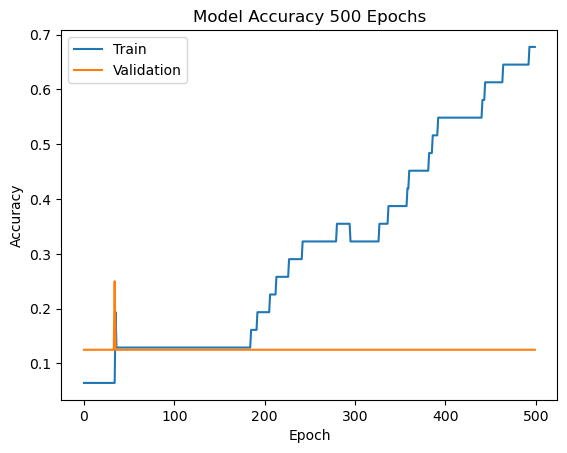

In [32]:
plot_accuracy(history500, '500 Epochs')

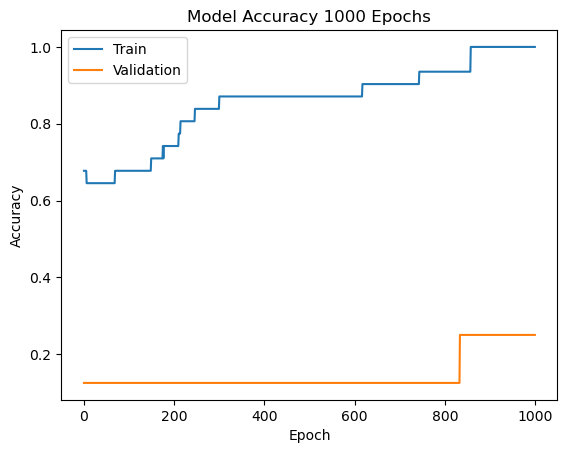

In [33]:
plot_accuracy(history1000, '1000 Epochs')

In [34]:
def save_file(file_name, file):
    with open(file_name, 'wb') as f:
        pickle.dump(file, f)

In [35]:
model.save('coffee_bot_model')

save_file('tokenizer.pkl', tokenizer)
save_file('encoder.pkl', le)

INFO:tensorflow:Assets written to: coffee_bot_model\assets
